##Background
Lending Club operates as a peer-to-peer lending platform, facilitating loans between individual borrowers and investors. As the company grows, it faces challenges in accurately assessing the creditworthiness of applicants, which is critical for both borrower satisfaction and investor confidence.
###Business Objective
To identify variables which are strong indicators of default and potentially use the insights in approval /rejection decision making.

#### Importing Libraries

In [1]:
#import the required libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#read the loan dataset using pandas
loan_df = pd.read_csv("/content/loan.csv", sep=",", engine="python", encoding='utf-8', on_bad_lines='skip')

#### Data Understanding

In [5]:
#know the shape of the data frame
loan_df.shape

(39717, 111)

In [6]:
#see the sample of the dataframe
loan_df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
#see the data types of columns
loan_df.dtypes

,0
id,int64
member_id,int64
loan_amnt,int64
funded_amnt,int64
funded_amnt_inv,float64
...,...
tax_liens,float64
tot_hi_cred_lim,float64
total_bal_ex_mort,float64
total_bc_limit,float64


In [8]:
# check null values across all columns
loan_df.isnull().sum()

,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
...,...
tax_liens,39
tot_hi_cred_lim,39717
total_bal_ex_mort,39717
total_bc_limit,39717


We observe that few columns at the end have only nulls values so we can remove those columns having only null values from the dataframe

### Data Cleaning

In [9]:
#dropping columns having only nulls
loan_df.dropna(axis = 1, how = 'all', inplace = True)

In [10]:
loan_df.shape

(39717, 57)

In [11]:
#check for nulls again
loan_df.isnull().sum()

,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0


In [12]:
#get list of unique variables per column
print(loan_df.nunique())

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26526
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

##### Columns like next_pymnt_d, mths_since_last_record, mths_since_last_delinq have too many null values hence dropping these columns.
##### desc, emp_title , url, title, id, member_id, zip_code,last_credit_pull_d, addr_state are either text values or doesn't have any impact on loan status.
##### Columns with only 1 unique value-pymnt_plan, initial_list_status,collections_12_mths_ex_med, policy_code, application_type, acc_now_delinq, chargeoff_within_12_mths,delinq_amnt,tax_liens are not useful so dropping them


In [13]:
#drop columns mentioned above
loan_df.drop(columns=['next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq', 'desc','emp_title','url','title','id','member_id','zip_code','last_credit_pull_d','addr_state','pymnt_plan','initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths','delinq_amnt','tax_liens'], axis=1, inplace=True)

Below are the columns which doesn't impact loan approval since these are post approval features. So dropping them
*   revol_bal
*   out_prncp
*   delinq_2yrs
*   total_pymnt
*   total_rec_prncp
*   total_rec_int
*   total_rec_late_fee
*   recoveries
*   collection_recovery_fee
*   last_pymnt_d
*   last_pymnt_amnt
*   out_prncp_inv
*   total_pymnt_inv



In [14]:
#drop columns mentioned above
loan_df.drop(columns=['revol_bal','out_prncp','delinq_2yrs','total_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','out_prncp_inv','total_pymnt_inv'], axis=1, inplace=True)

In [15]:
loan_df.shape

(39717, 23)

In [16]:
loan_df.isnull().sum()

,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_length,1075
home_ownership,0


Missing Value Treatment

In [17]:
loan_df.emp_length.value_counts()

,count
emp_length,
10+ years,8879
< 1 year,4583
2 years,4388
3 years,4095
4 years,3436
5 years,3282
1 year,3240
6 years,2229
7 years,1773


**This shows that the mode value has far higher frequency than that of the next most frequent value.**

This means that we can assign the value of mode to the null values in the column.
Also the missing values are in very low percentage. So imputung with mode value doesnt affect the analysis.

In [18]:
#replace nulls in emp_length with mode
loan_df['emp_length'].fillna(loan_df['emp_length'].mode()[0], inplace=True)
loan_df.emp_length.isna().sum()

0

In [19]:
# dropping 50 rows of revol_util since we cannot assign % utilisation based on missing value trteatment
loan_df.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan_df.revol_util.isna().sum()

0

In [20]:
loan_df.pub_rec_bankruptcies.describe()

,pub_rec_bankruptcies
count,38970.000000
mean,0.043290
std,0.204392
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2.000000


Mean, Median and mode are almost 0 for pub_rec_bankruptcies, so imputing 0 for missing values

In [21]:
loan_df.pub_rec_bankruptcies.fillna(0, inplace=True)
loan_df.isnull().sum()

,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_length,0
home_ownership,0


## **Standardizing the data**

* "revol_util","int_rate" columns has continous values.So we need to standardize the data in this column by removing "%" symbol.
* "emp_length" --> { (< 1 year) is assumed as 0 and 10+ years is assumed as 10 }
*  Remove months from "term" column and make it a numerical value for analysis purpose.
* "issue_d" and "earliest_cr_line" are date fields so convert them to date format.





In [22]:
#remove the percentage sign and convert the columns to float
loan_df.int_rate=loan_df.int_rate.apply(lambda x : float(x.replace("%", "")))
loan_df.revol_util=loan_df.revol_util.apply(lambda x : float(str(x).replace("%", "")))

#cleaning emp_length
loan_df.emp_length = pd.to_numeric(loan_df.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

#remove the text month and convert the column to int
loan_df.term=loan_df.term.apply(lambda x : int(x.replace(" months", "")))


In [23]:
#pandas convert datetime fileds
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y') #date is in Dec-11 format
loan_df['earliest_cr_line'] = pd.to_datetime(loan_df['earliest_cr_line'], format='%b-%y') #date is in Dec-11 format

In [24]:
#split date fields for better analysis
loan_df['issue_d_month']=pd.DatetimeIndex(loan_df['issue_d']).month
loan_df['issue_d_year']=pd.DatetimeIndex(loan_df['issue_d']).year
loan_df['earliest_cr_line_month']=pd.DatetimeIndex(loan_df['earliest_cr_line']).month
loan_df['earliest_cr_line_year']=pd.DatetimeIndex(loan_df['earliest_cr_line']).year

In [25]:
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,...,1,3,0,83.7,9,0.0,12,2011,1,1985
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,...,5,3,0,9.4,4,0.0,12,2011,4,1999
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,...,2,2,0,98.5,10,0.0,12,2011,11,2001
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,...,1,10,0,21.0,37,0.0,12,2011,2,1996
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1,RENT,...,0,15,0,53.9,38,0.0,12,2011,1,1996


Outlier Treatment

<Axes: ylabel='annual_inc'>

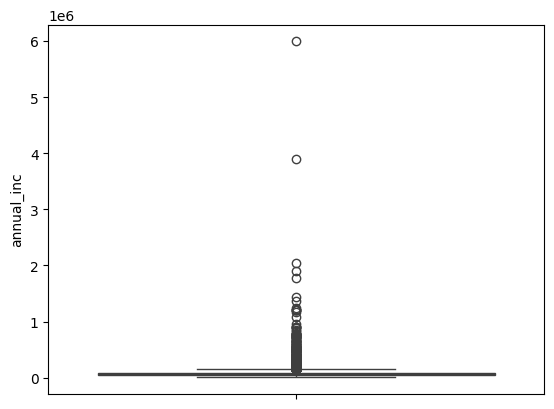

In [26]:
sns.boxplot(loan_df['annual_inc'])

Clearly indicating the presence of outliers.So, Removing them.

Let's see the quantile info and take an appropriate action.
The values after 95 percentile seems to be disconnected from the general distribution and also there is huge increase in the value for small quantile variation.
So, considering threshold for removing outliers as 0.95

In [27]:
quantile_info = loan_df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

,annual_inc
0.50,59000.00
0.75,82400.00
0.90,116000.00
0.95,142000.00
0.97,165996.00
0.98,187000.00
0.99,234997.36


<Axes: ylabel='annual_inc'>

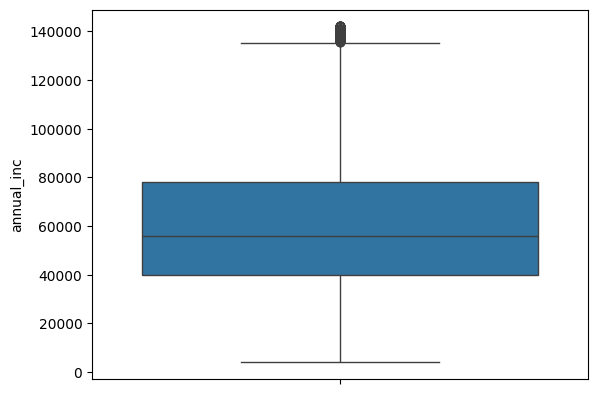

In [28]:
per_95_annual_inc = loan_df['annual_inc'].quantile(0.95)
loan_df = loan_df[loan_df.annual_inc <= per_95_annual_inc]
sns.boxplot(loan_df.annual_inc)

Now the "annual_inc" data looks good and proceeding next.

Let's analyze other numerical variables which could possibly have outliers.
*  dti
* loan_amnt
* funded_amnt_inv

<Axes: ylabel='dti'>

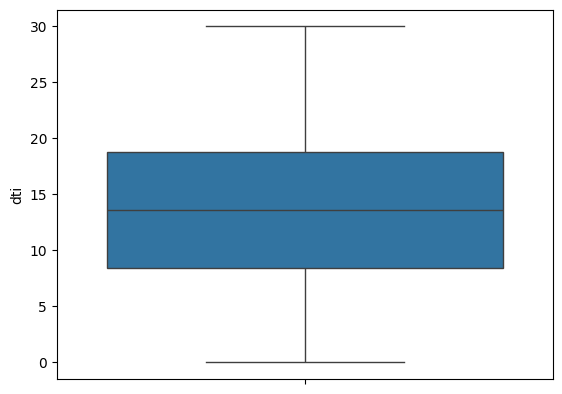

In [29]:
sns.boxplot(loan_df.dti)

<Axes: ylabel='loan_amnt'>

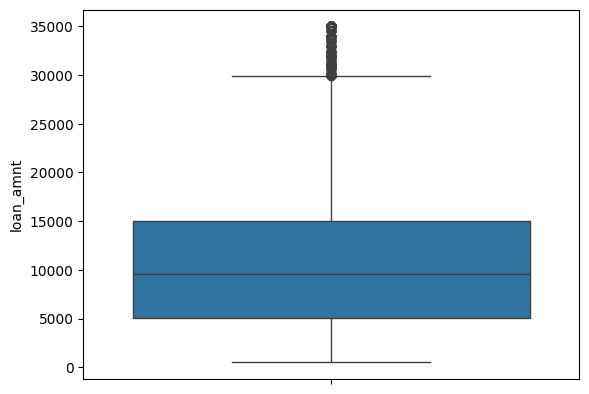

In [30]:
sns.boxplot(loan_df.loan_amnt)

<Axes: ylabel='funded_amnt_inv'>

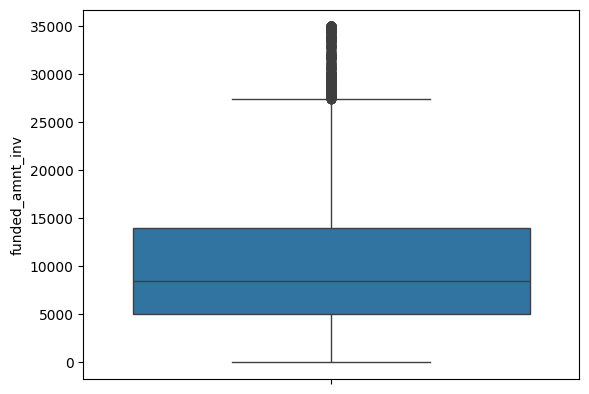

In [31]:
sns.boxplot(loan_df.funded_amnt_inv)

Though there are some values far from distribution, the distribution is pretty continousand there is no need to remove outliers / extreme values for these above columns.

**Univariate Analysis**

We are analyzing and visualizing only the defaulter. So subsetting the data by removing 'Current' and 'Paid off' from loan status.

In [32]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'pub_rec_bankruptcies',
       'issue_d_month', 'issue_d_year', 'earliest_cr_line_month',
       'earliest_cr_line_year'],
      dtype='object')

<Axes: xlabel='loan_status', ylabel='count'>

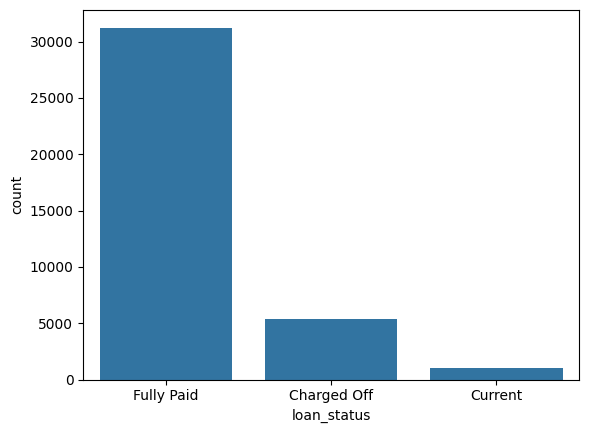

In [33]:
sns.countplot(x = 'loan_status', data = loan_df)

In [34]:
#create a new data frame with only default status/Charged Off
loan_default=loan_df[(loan_df.loan_status!="Current") & (loan_df.loan_status!="Fully Paid")]

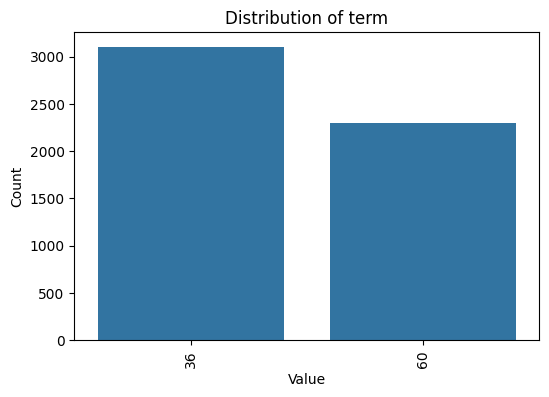

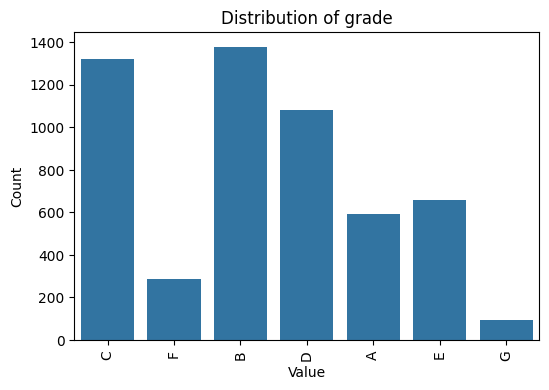

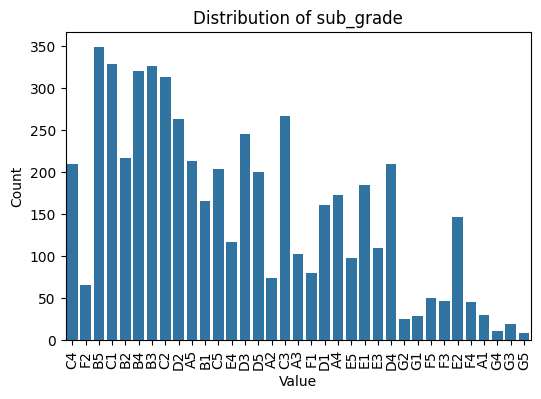

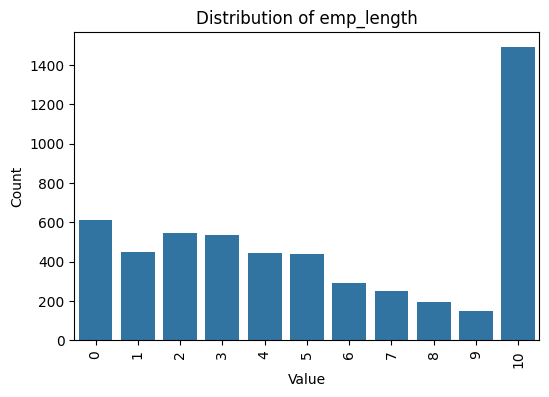

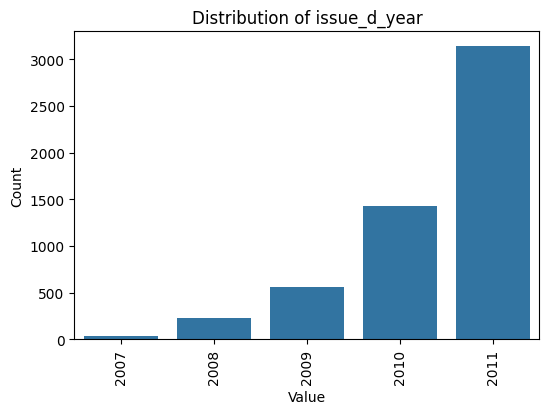

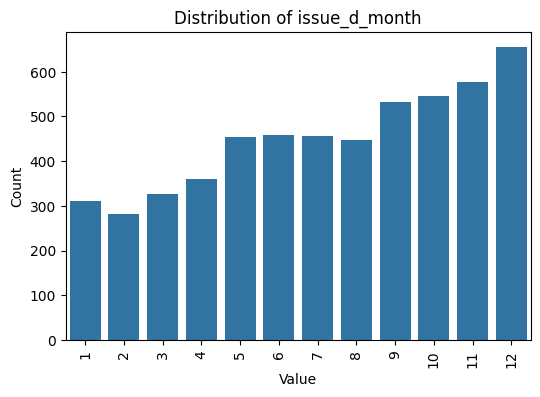

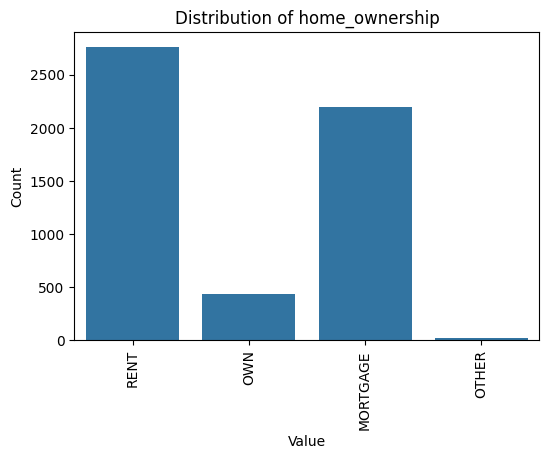

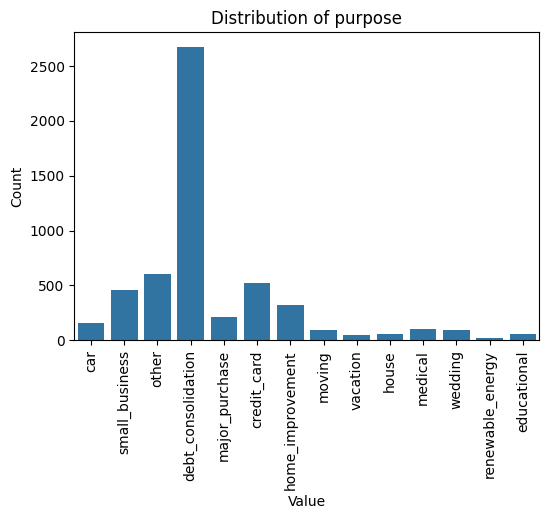

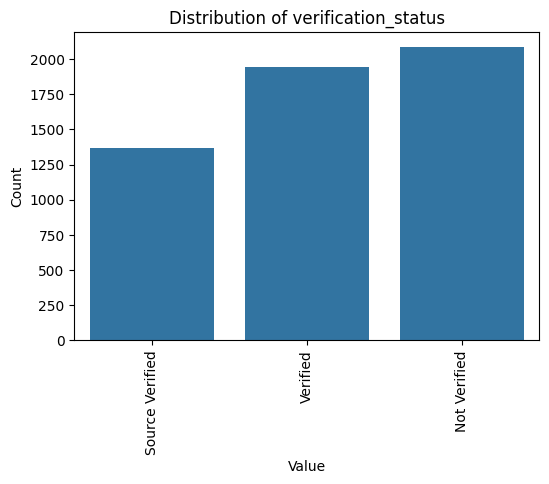

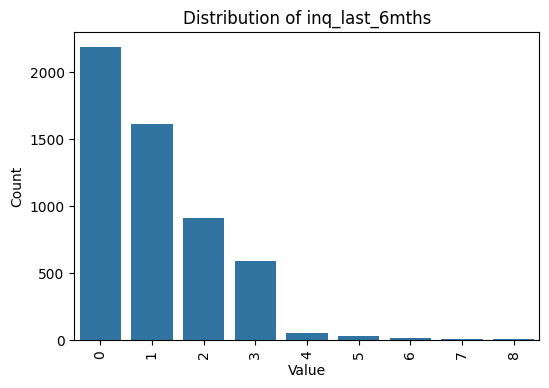

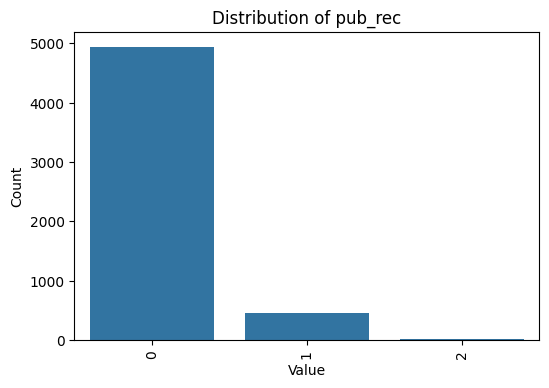

In [35]:
#plotting all the categorical variables using countplot
loan_cat=loan_default[['term','grade','sub_grade','emp_length','issue_d_year','issue_d_month','home_ownership','purpose','verification_status','inq_last_6mths','pub_rec']]

for data in loan_cat.columns:
    # Create a new figure for each dataset
    plt.figure(figsize=(6,4))

    # Generate the histogram plot with KDE (Kernel Density Estimate)
    sns.countplot(x=data, data=loan_cat)

    # Set the title and labels
    plt.title(f'Distribution of {data}')
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.xticks(rotation=90)

    # Display the plot
    plt.show()

**Above analysis shows**
*   Loans taken for 36 months term are most likely defaulted
*   Most of the people who defaulted fall under Grade B or Grade C.
*   Within Grade B, people with B5 sub grade are more prone to defaulting. Within Grade C, it is C1.
*   Most of the defaulted loans are taken by people with employment length of 10.
*   Most of the people who took loan in 2011 defaulted.
*   People who took loan in last months of the year are more likely to default majority being in December.
*   Most of the people who defaulted doesn't own the house and are living on Rent / Mortgage.
*   Most People defaulted when the loan status is not verified.
*   Most People who have done 0 enquiries in last 6 months defaulted.
*   Debt Consolidation is the major purpose for taking the loan for the people who defaulted.







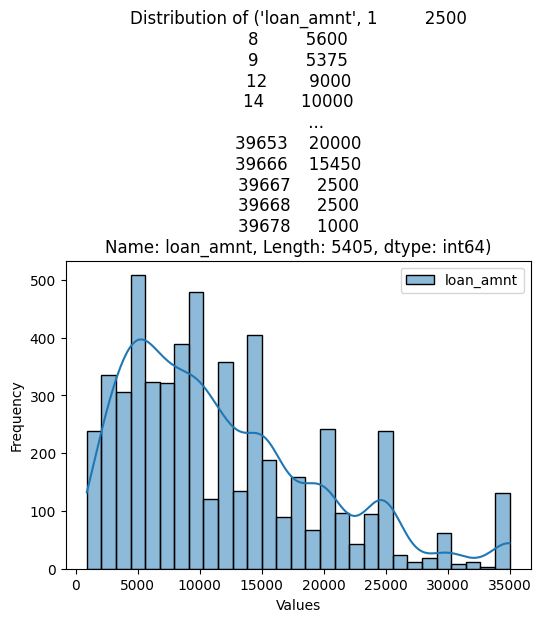

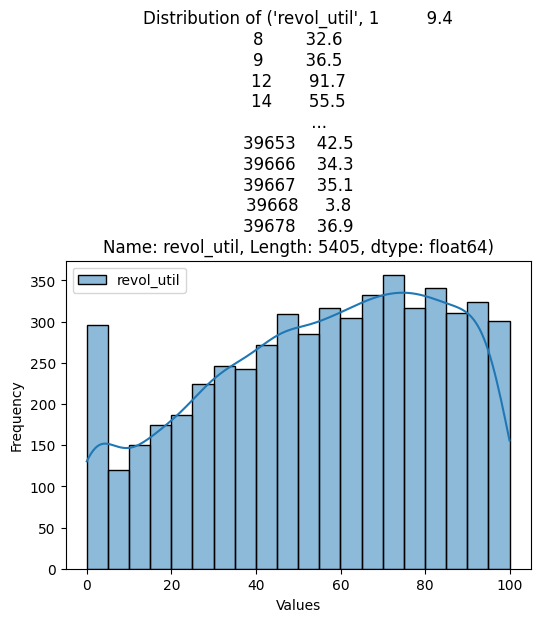

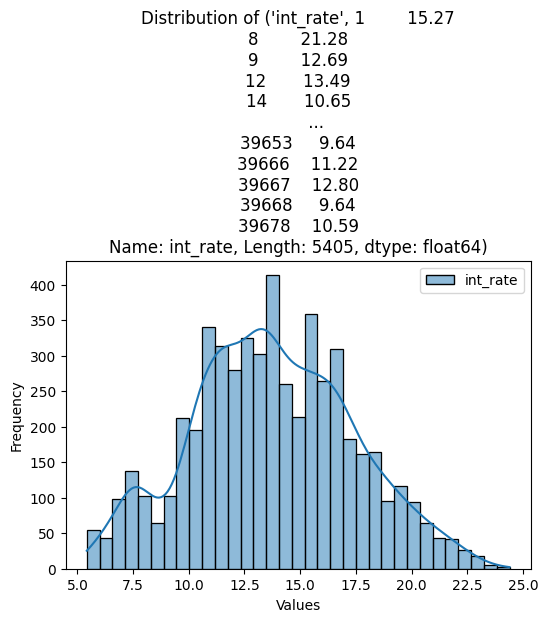

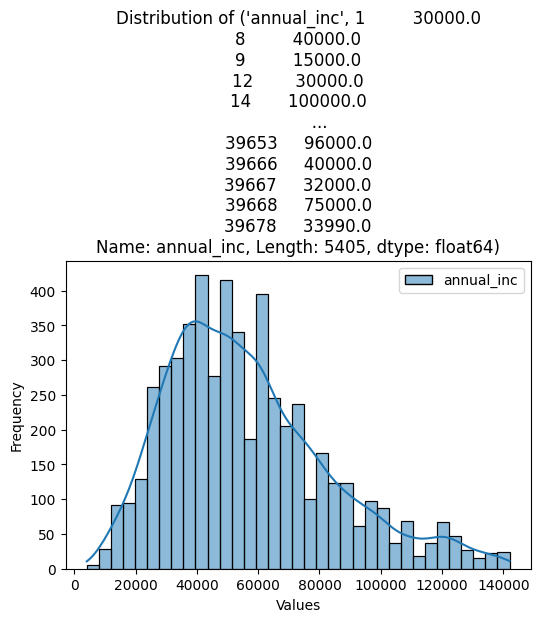

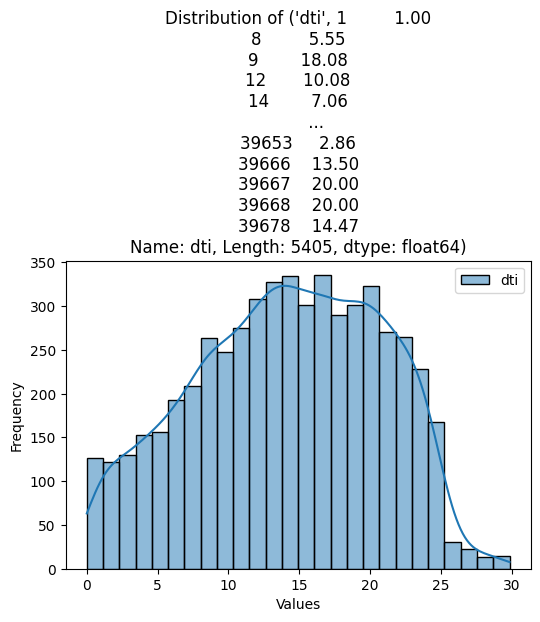

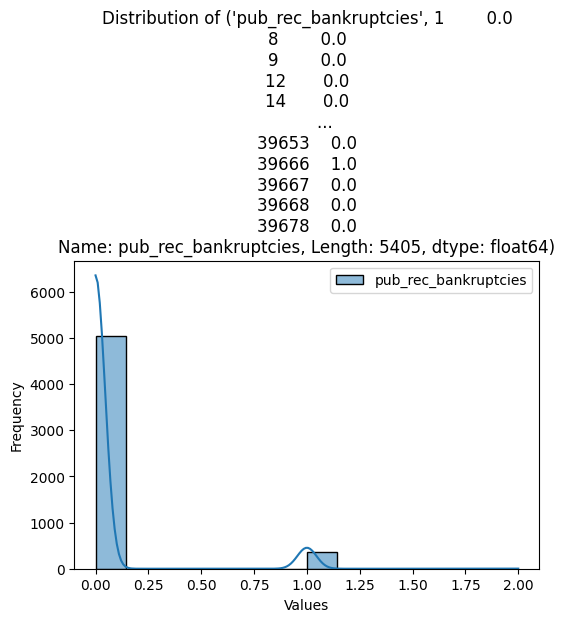

In [36]:
#plotting all the continuous variables using histogram
loan_cont=loan_default[['loan_amnt','revol_util','int_rate','annual_inc','dti','pub_rec_bankruptcies']]

for data in loan_cont.items():
    # Create a new figure for each dataset
    plt.figure(figsize=(6,4))

    # Generate the histogram plot with KDE (Kernel Density Estimate)
    sns.histplot(data, kde=True)

    # Set the title and labels
    plt.title(f'Distribution of {data}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')

    # Display the plot
    plt.show()


**Above Analysis shows**
*   Defaulted People are mostly applying for lower loan amounts (<15000).
*   People who defaulted have increasing revol_util and the peak at 0.
*   Loans with interest rate between 10% to 17% are majorly defaulted.
*   Most of the loans defaulted are taken by people whose annual income is in middle (>20000 and <80000)
*  Defaulted Loan applications increased till 20. And there is a major drop as dti goes beyond 24.
*  pub_rec_bankruptcies is not a valid parameter as it is completely zeros. So dropping it.





In [37]:
loan_default.pub_rec_bankruptcies.describe()

,pub_rec_bankruptcies
count,5405.000000
mean,0.067530
std,0.252431
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2.000000


In [38]:
loan_default.drop(columns=['pub_rec_bankruptcies'], axis=1, inplace=True)

**Bi-Variate Analysis**

Before going ahead with Bi-Variate analysis, create buckets for continuous variable

In [49]:
#bucketing interest rate
bin_labels = ['Low', 'Medium', 'High','Very High']
bins = [0, 10, 15, 20,25]
loan_default['int_rate_bucket']= pd.cut(loan_default['int_rate'],  bins=bins, labels=bin_labels)

#bucketing loan amount
bin_labels = ['0-5000', '5000-10000', '10000-15000', '15000-20000','20000-25000', '25000-30000','30000-35000']
bins = [-1, 5000, 10000, 15000, 20000,25000,30000,35000]
loan_default['loan_amnt_bucket'] = pd.cut(loan_default['funded_amnt_inv'], bins=bins, labels=bin_labels)


#bucketing for annual income
bin_labels = ['0-25K', '25K-50K', '50K-75K', '75K-100K','100K-125K', '125K-150K','200K+']
bins = [0, 25000, 50000, 75000, 100000,125000,1500000,2000000]
loan_default['annual_inc_bucket'] = pd.cut(loan_default['annual_inc'], bins=bins, labels=bin_labels)

#bucketing dti
bin_labels = ['0-10', '10-15', '15-20', '20-25','25-30']
bins = [0, 10, 15, 20, 25,30]
loan_default['dti_bucket'] = pd.cut(loan_default['dti'], bins=bins, labels=bin_labels)

In [50]:
loan_default.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,revol_util,total_acc,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,int_rate_bucket,loan_amnt_bucket,annual_inc_bucket,dti_bucket
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,...,9.4,4,12,2011,4,1999,High,0-5000,25K-50K,0-10
8,5600,5600,5600.0,60,21.28,152.39,F,F2,4,OWN,...,32.6,13,12,2011,4,2004,Very High,5000-10000,25K-50K,0-10
9,5375,5375,5350.0,60,12.69,121.45,B,B5,0,RENT,...,36.5,3,12,2011,9,2004,Medium,5000-10000,0-25K,15-20
12,9000,9000,9000.0,36,13.49,305.38,C,C1,0,RENT,...,91.7,9,12,2011,4,2004,Medium,5000-10000,25K-50K,10-15
14,10000,10000,10000.0,36,10.65,325.74,B,B2,3,RENT,...,55.5,29,12,2011,5,1991,Medium,5000-10000,75K-100K,0-10


Analysing annual income with other variables

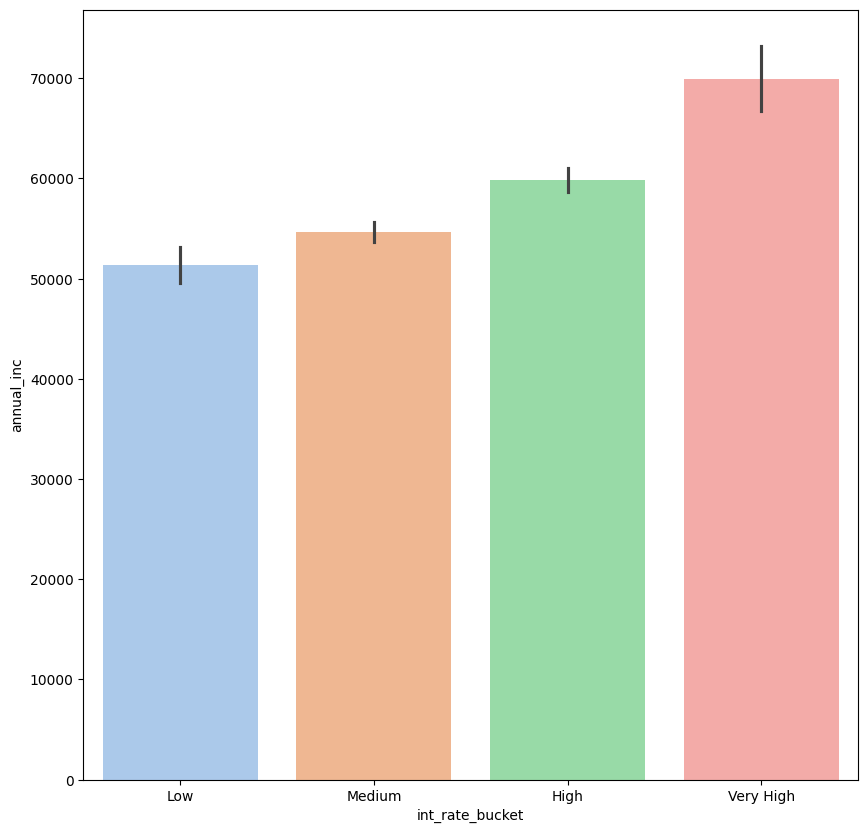

In [51]:
#Annual income vs. Interest rate
plt.figure(figsize=(10,10))
sns.barplot(data =loan_default,x='int_rate_bucket', y='annual_inc',palette="pastel")
plt.show()

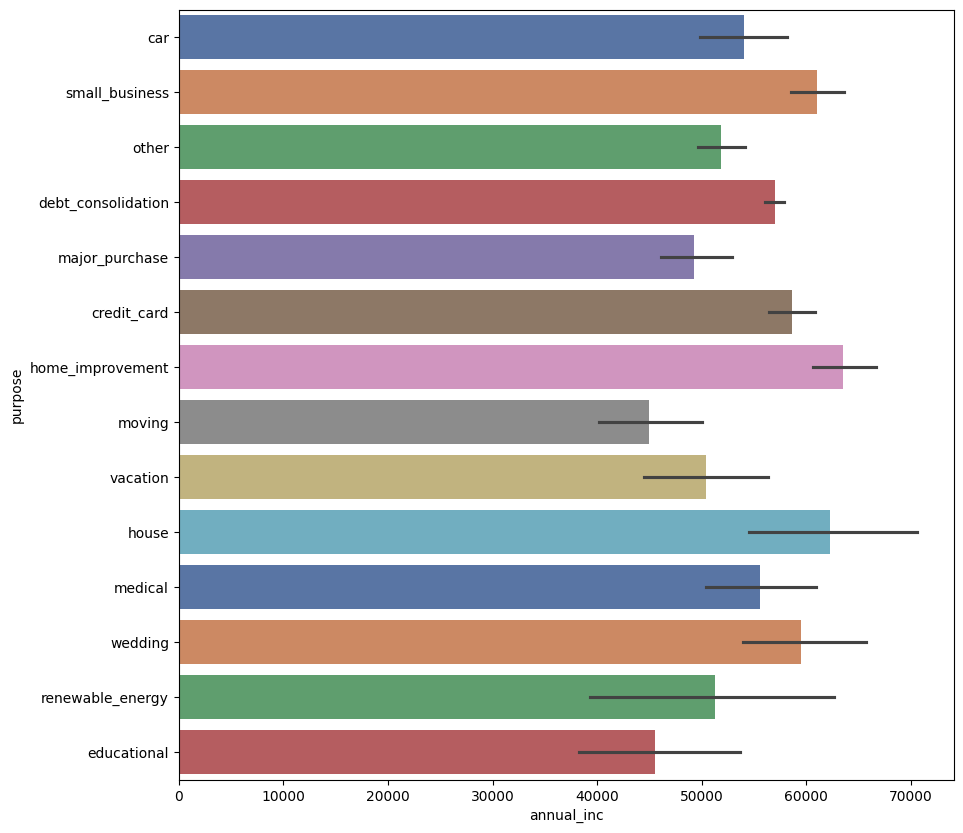

In [52]:
#Annual income vs. Purpose
plt.figure(figsize=(10,10))
sns.barplot(data =loan_default,x='annual_inc', y='purpose',palette="deep")
plt.show()

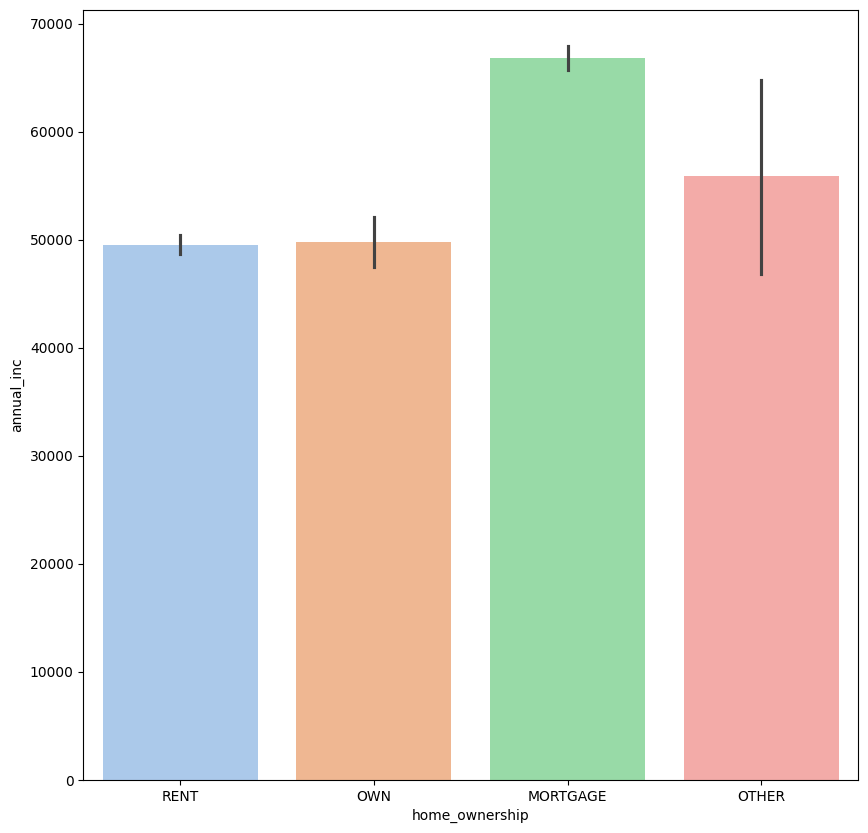

In [53]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_default,x='home_ownership', y='annual_inc',palette="pastel")
plt.show()

<Axes: xlabel='annual_inc_bucket', ylabel='loan_amnt'>

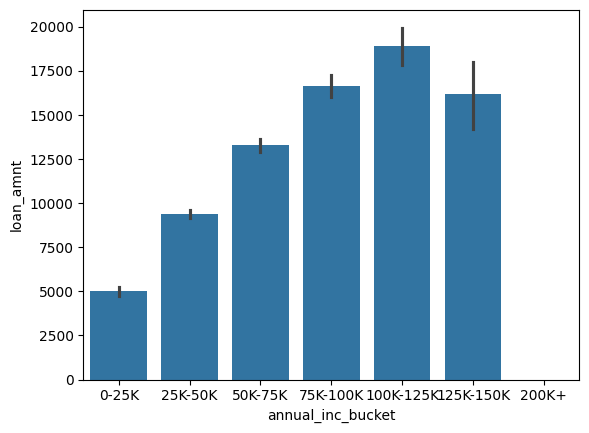

In [54]:
sns.barplot(x = "annual_inc_bucket", y = "loan_amnt", data = loan_default)

*  People who took high interest rate and having higher annual income have defaulted the most
* People who defaulted with higher annual income have taken the loan for house, house improvement and small business
*  Defaulted people with higher income doesn't have own house and are living on mortgage
*  Defaulted people with higher income have taken higher loan amount (100k-125k being the highest)





Analysing loan_amount with other columns

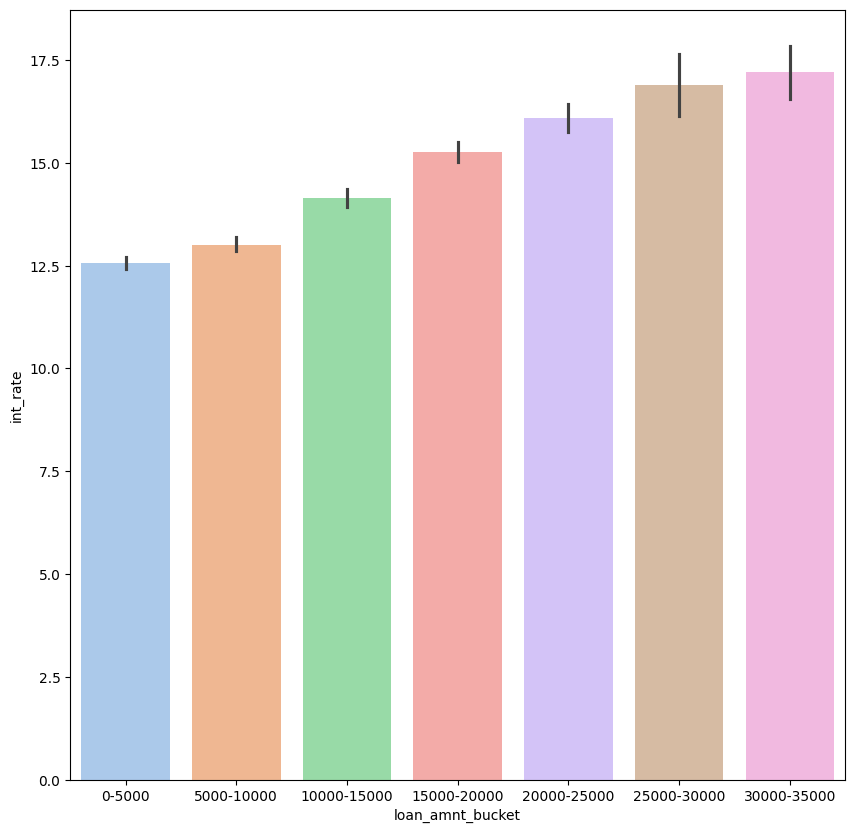

In [57]:
#Loan Amount vs. Interest Rate
plt.figure(figsize=(10,10))
sns.barplot(data =loan_default,x='loan_amnt_bucket', y='int_rate', palette="pastel")
plt.show()

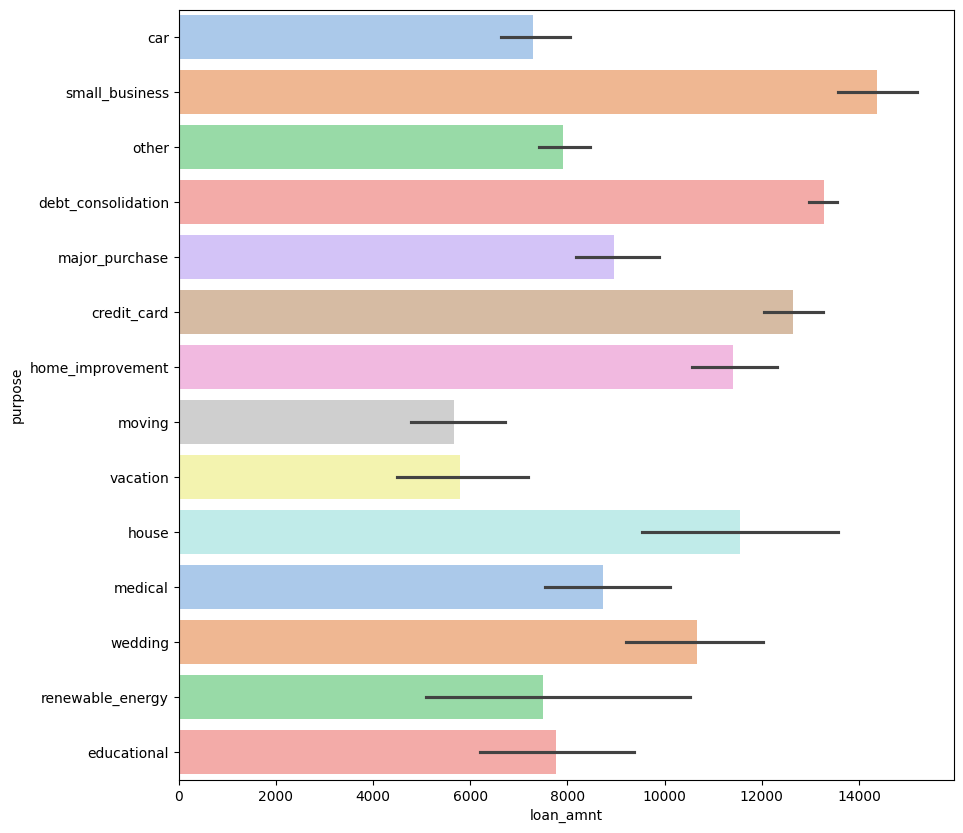

In [58]:
#Loan Amount Vs. Purpose
plt.figure(figsize=(10,10))
sns.barplot(data =loan_default,x='loan_amnt', y='purpose',palette="pastel")
plt.show()

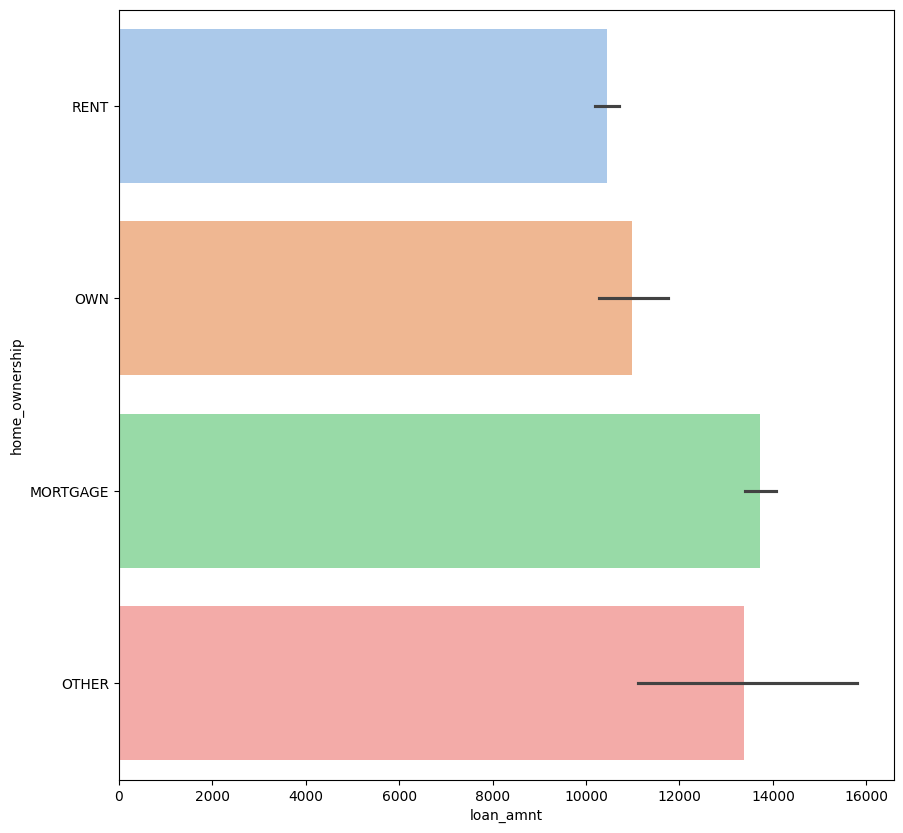

In [59]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_default,x='loan_amnt', y='home_ownership',palette="pastel")
plt.show()

<Axes: xlabel='issue_d_year', ylabel='loan_amnt'>

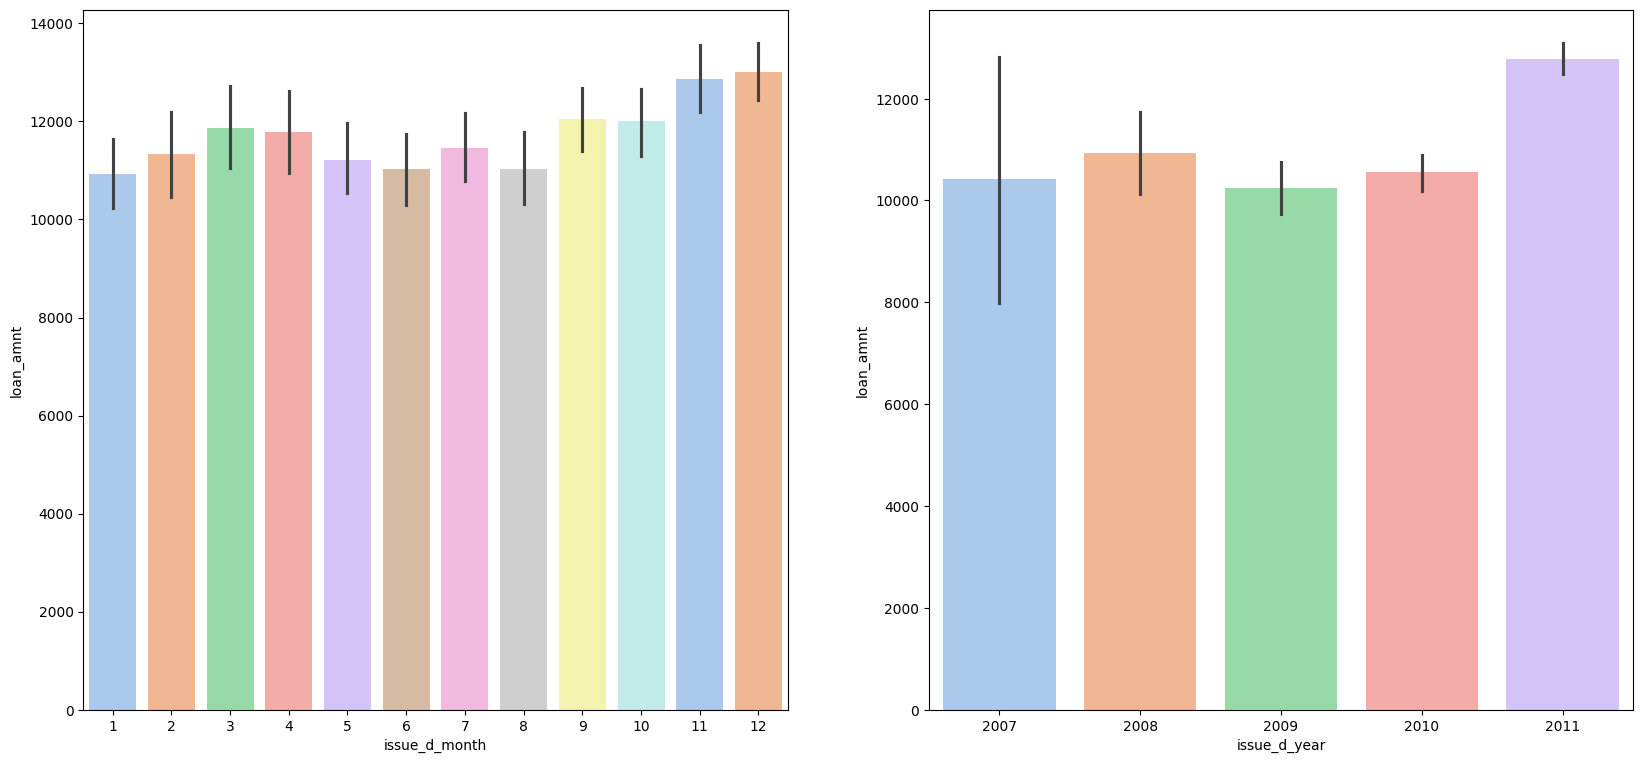

In [62]:
#Loan amount vs month issued and year issued
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =loan_default,y='loan_amnt', x='issue_d_month', palette="pastel")
plt.subplot(222)
sns.barplot(data =loan_default,y='loan_amnt', x='issue_d_year', palette="pastel")

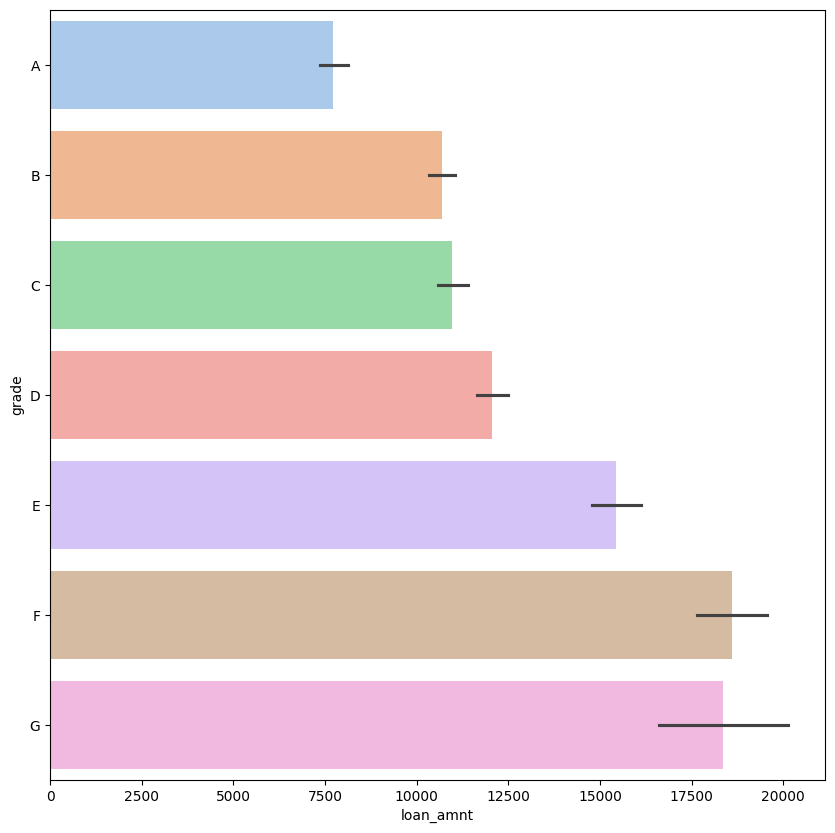

In [63]:
#Loan amount vs Grade
plt.figure(figsize=(10,10))
sns.barplot(data =loan_default,x='loan_amnt', y='grade',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

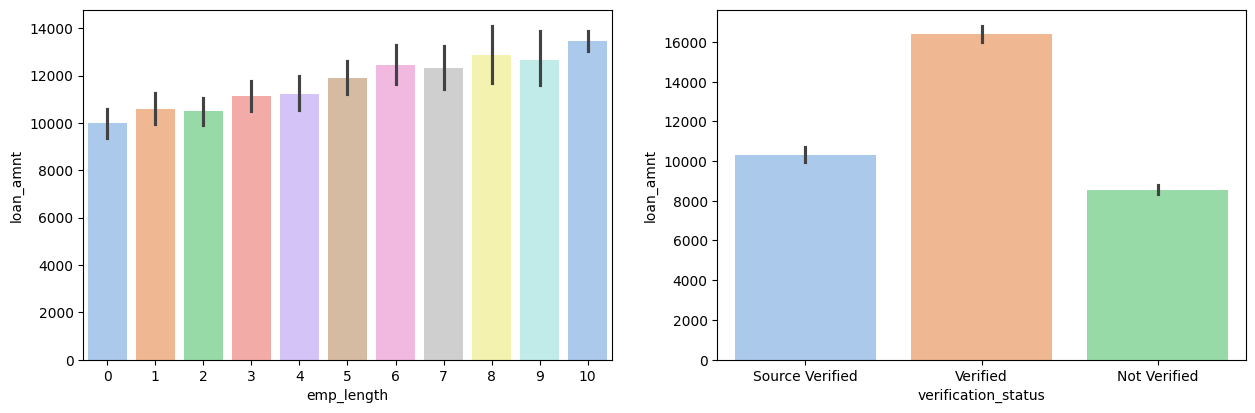

In [69]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.barplot(data =loan_default,y='loan_amnt', x='emp_length',palette="pastel")
plt.subplot(222)
sns.barplot(data =loan_default,y='loan_amnt', x='verification_status',palette="pastel")

**Below are the hypothesis for Defaulted people**
*  People took highest loan amount for small business
*  People with highest loan amount took loans at highest interest rate
*  People who took highest loan amout doesn't own house and live on mortgage
*  People took highest loans in 2011 and mostly in last months of any year
*  People with Grade F has taken highest loan amount
*  People who are employed for more than 10 years took higher amount of loan
*  People with Verified status took highest loan amount







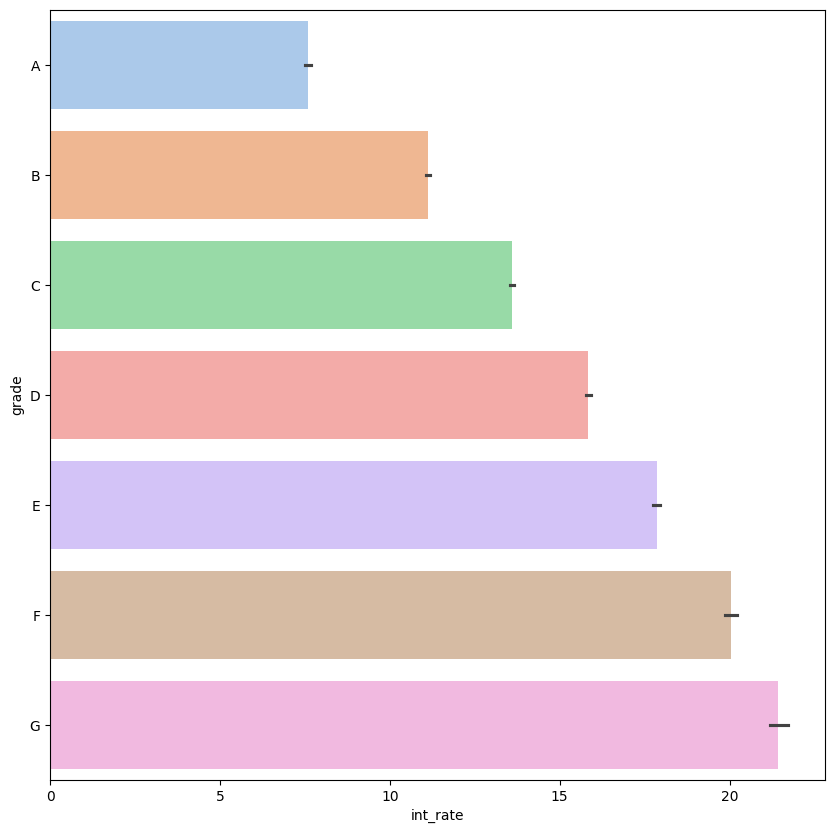

In [70]:
#Grade vs interest rate
plt.figure(figsize=(10,10))
sns.barplot(data =loan_default,x='int_rate', y='grade', palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

<Axes: xlabel='loan_amnt_bucket', ylabel='int_rate'>

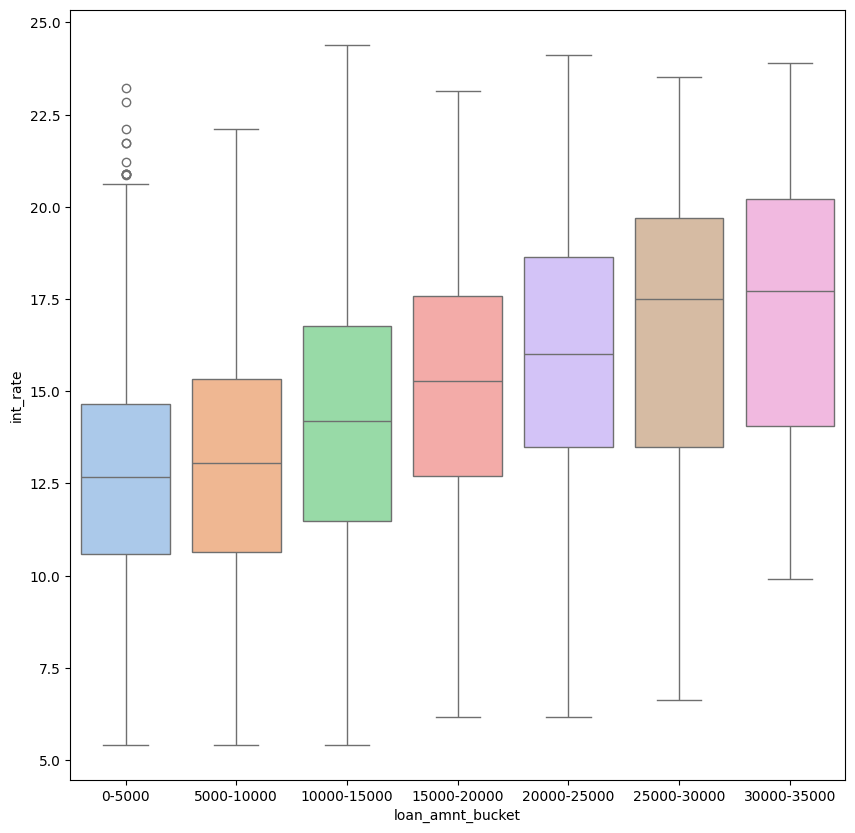

In [73]:
plt.figure(figsize=(10,10))
plt.tight_layout()
sns.boxplot(data =loan_default,y ='int_rate', x ='loan_amnt_bucket',palette="pastel")

The interest rate and loan amount for charged off loans are pretty high.These can be the strong driving factors for loan defaulting.

<Axes: xlabel='term', ylabel='loan_amnt'>

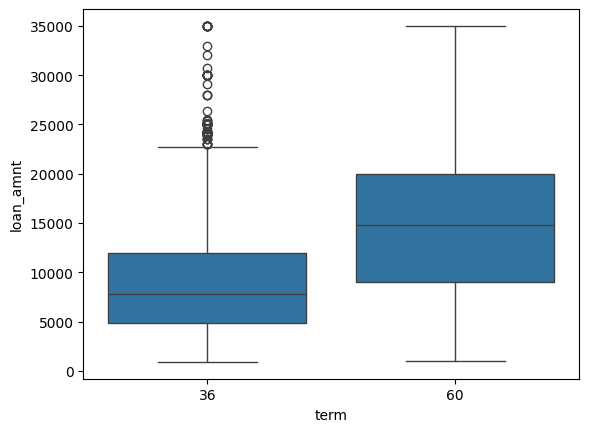

In [74]:
sns.boxplot(x = 'term', y = 'loan_amnt', data = loan_default)

**Observations**

Based on the above analysis, There is more probability of defaulting when :
*   Applicants taking loan for 'home improvement' or 'small business' and have income of 60k -70k
*  Applicants who receive interest at the rate of 20%-25% and have an income of 60k-80k
*  Applicants whose home ownership is 'MORTGAGE and have an income of 60K-70K
*  Applicant with annual income of 100K-125K and have taken loan amount of 17.5K to 20K
*  Applicants who have taken a loan in the range 30k - 35k and are charged interest rate of 15%-17.5%
*  Applicants who have taken a loan for small business and the loan amount is between 12K to 14K
*  Applicants whose home ownership is 'MORTGAGE and have loan of 14-16k
*  When grade is F and loan amount is between 15k-20k
*  When employment length is 10yrs and loan amount is 12k-14k
*  When the loan is verified and loan amount is above 16k
*  For grade G and interest rate above 20%












**Based on above Observations, the factors that impact defaulting of loan are**
1. Annual Income
2. Purpose
3. Interest Rate
4. Loan Amount
5. Grade
6. Home Ownership




